# 코드실행

In [53]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


import plotly.express as px
import matplotlib.pyplot as plt

import seaborn as sns

In [54]:
df = pd.read_csv('../use_df.csv')

In [55]:
df.columns

Index(['Unnamed: 0', 'Title', 'Series or Movie', 'COUNTRY', 'Release Date',
       'GENRE', 'VALUE', 'Genre_all', 'Tags', 'Languages', 'Hidden Gem Score',
       'Country Availability', 'Runtime', 'Director', 'Writer', 'Actors',
       'View Rating', 'IMDb Score', 'Rotten Tomatoes Score',
       'Metacritic Score', 'Awards Received', 'Awards Nominated For',
       'Boxoffice', 'Netflix Release Date', 'Production House', 'Summary',
       'IMDb Votes'],
      dtype='object')

In [56]:
df_score = df[['Title', 'Series or Movie', 'VALUE', 'Hidden Gem Score',
       'IMDb Score', 'IMDb Votes']]

In [57]:
df_score

,Title,Series or Movie,VALUE,Hidden Gem Score,IMDb Score,IMDb Votes
0,thequeensgambit,TV,44867,4.3,7.3,104495.0
1,365days,Movie,42149,1.6,3.2,50125.0
2,emilyinparis,TV,27138,3.5,7.1,45000.0
3,lucifer,TV,25729,8.4,6.9,57.0
4,theumbrellaacademy,TV,23480,4.0,8.0,159677.0
...,...,...,...,...,...,...
2973,thebournesupremacy,Movie,1,3.9,7.7,435887.0
2974,justfriends,Movie,1,2.5,6.2,106951.0
2975,child44,Movie,1,2.2,6.5,66251.0
2976,draculauntold,Movie,1,2.1,6.3,180432.0


In [58]:
df_score.isnull().sum()

Title                 0
Series or Movie       0
VALUE                 0
Hidden Gem Score    159
IMDb Score          159
IMDb Votes          159
dtype: int64

In [59]:
df_score = df_score.dropna(how='any',axis=0)

In [60]:
df_score.isnull().sum()

Title               0
Series or Movie     0
VALUE               0
Hidden Gem Score    0
IMDb Score          0
IMDb Votes          0
dtype: int64

In [72]:
a=df_score.corr()

In [73]:
a.style.background_gradient(cmap='Reds')

,VALUE,Hidden Gem Score,IMDb Score,IMDb Votes
VALUE,1.000000,-0.040255,0.045192,-0.000017
Hidden Gem Score,-0.040255,1.000000,0.142876,-0.285428
IMDb Score,0.045192,0.142876,1.000000,0.332135
IMDb Votes,-0.000017,-0.285428,0.332135,1.000000


In [62]:
df_plt = df_score.drop(['Title','Series or Movie'], axis = 1)

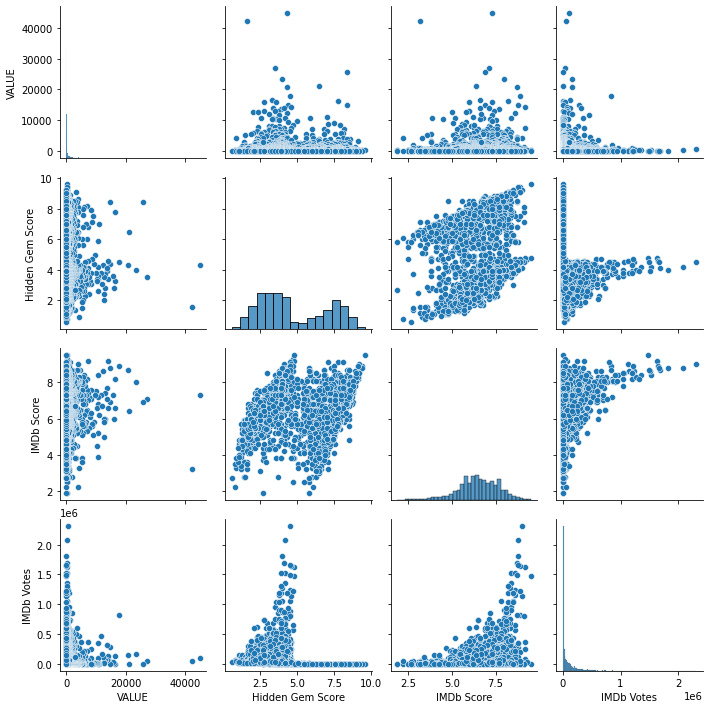

<Figure size 3500x1750 with 0 Axes>

In [63]:
sns.pairplot(df_plt, diag_kind='hist')
plt.figure(figsize=(10,5),dpi=350)
plt.show()

In [64]:
value = list(df_score.VALUE)
hidden = list(df_score['Hidden Gem Score'])
imdb = list(df_score['IMDb Score'])
vote = list(df_score['IMDb Votes'])

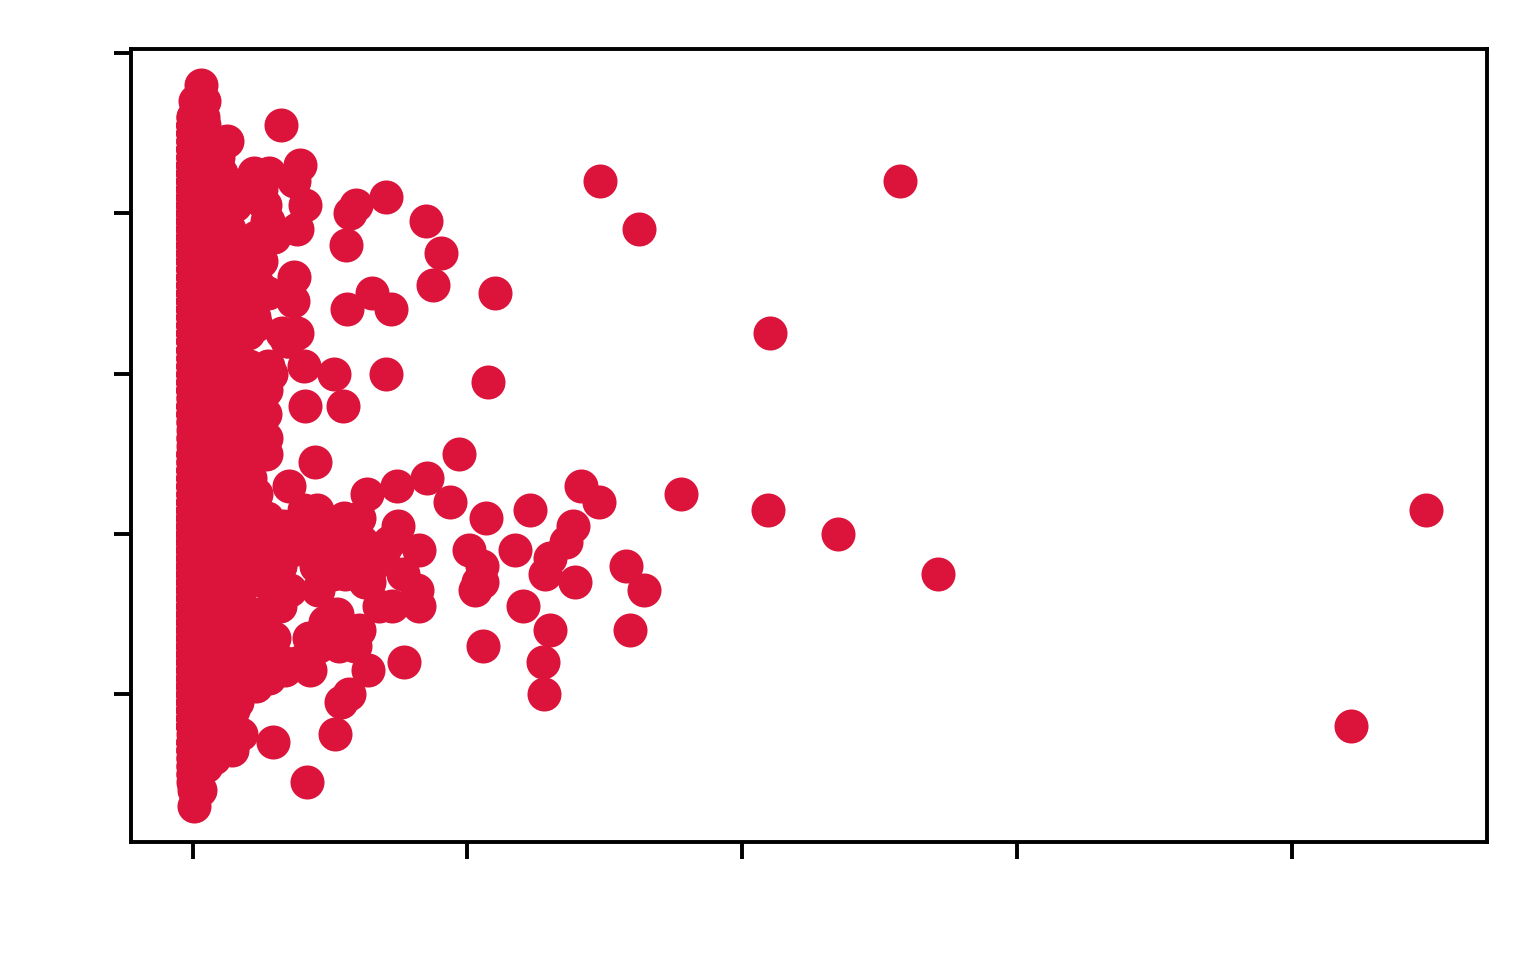

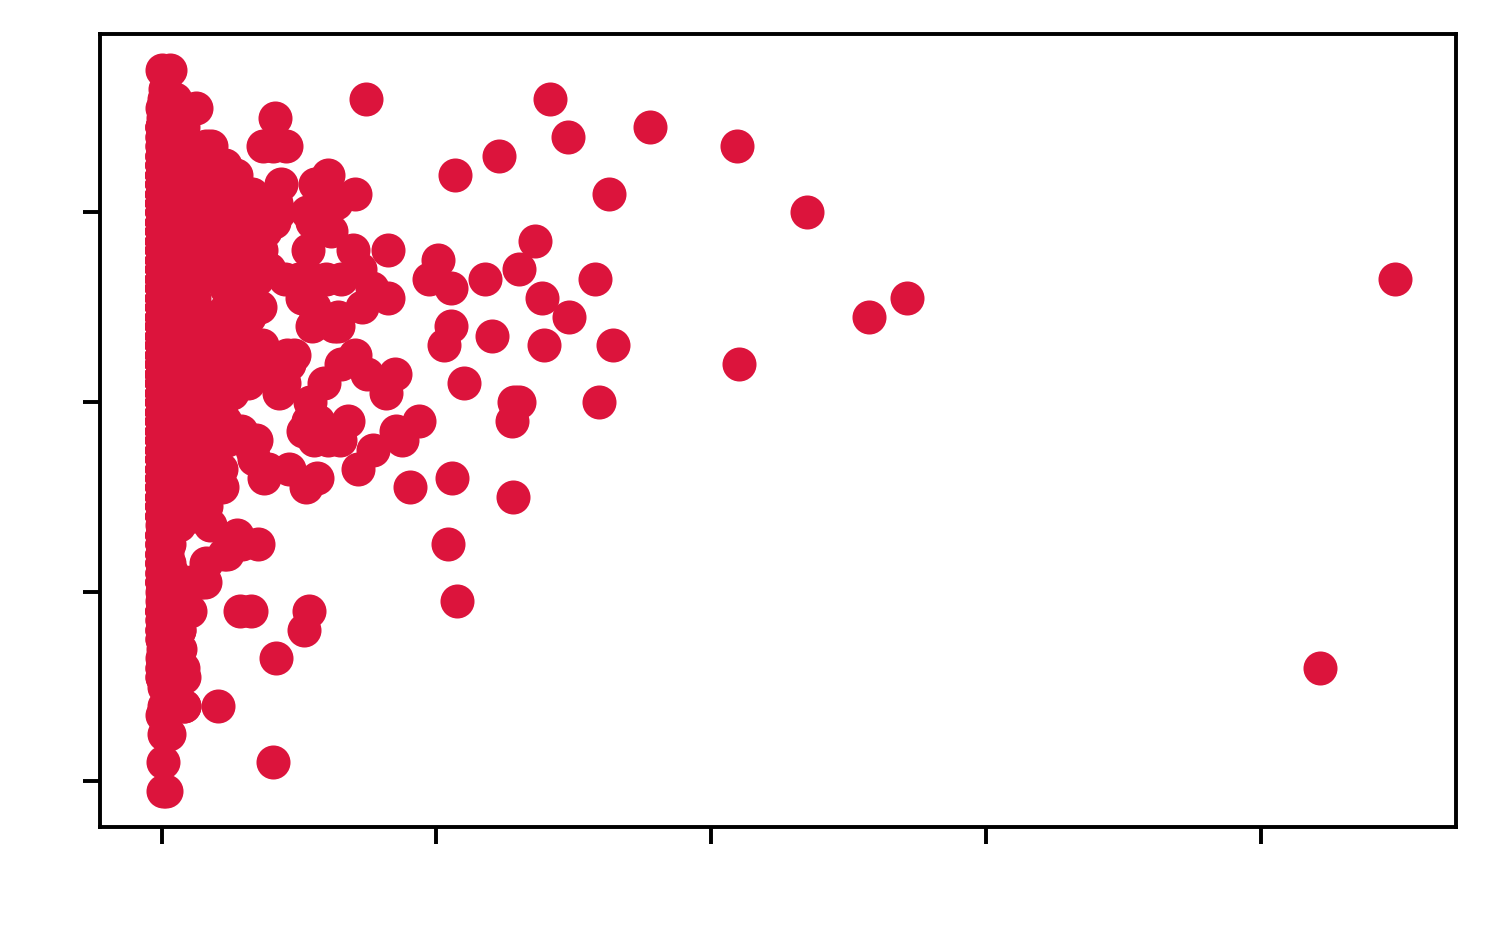

In [65]:
plt.figure(figsize=(5,3),dpi=350)
plt.scatter(value, hidden, color='crimson')
plt.yticks(color='white')
plt.xticks(color='white')
plt.show()

plt.figure(figsize=(5,3),dpi=350)
plt.scatter(value, imdb, color='crimson')
plt.yticks(color='white')
plt.xticks(color='white')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set'

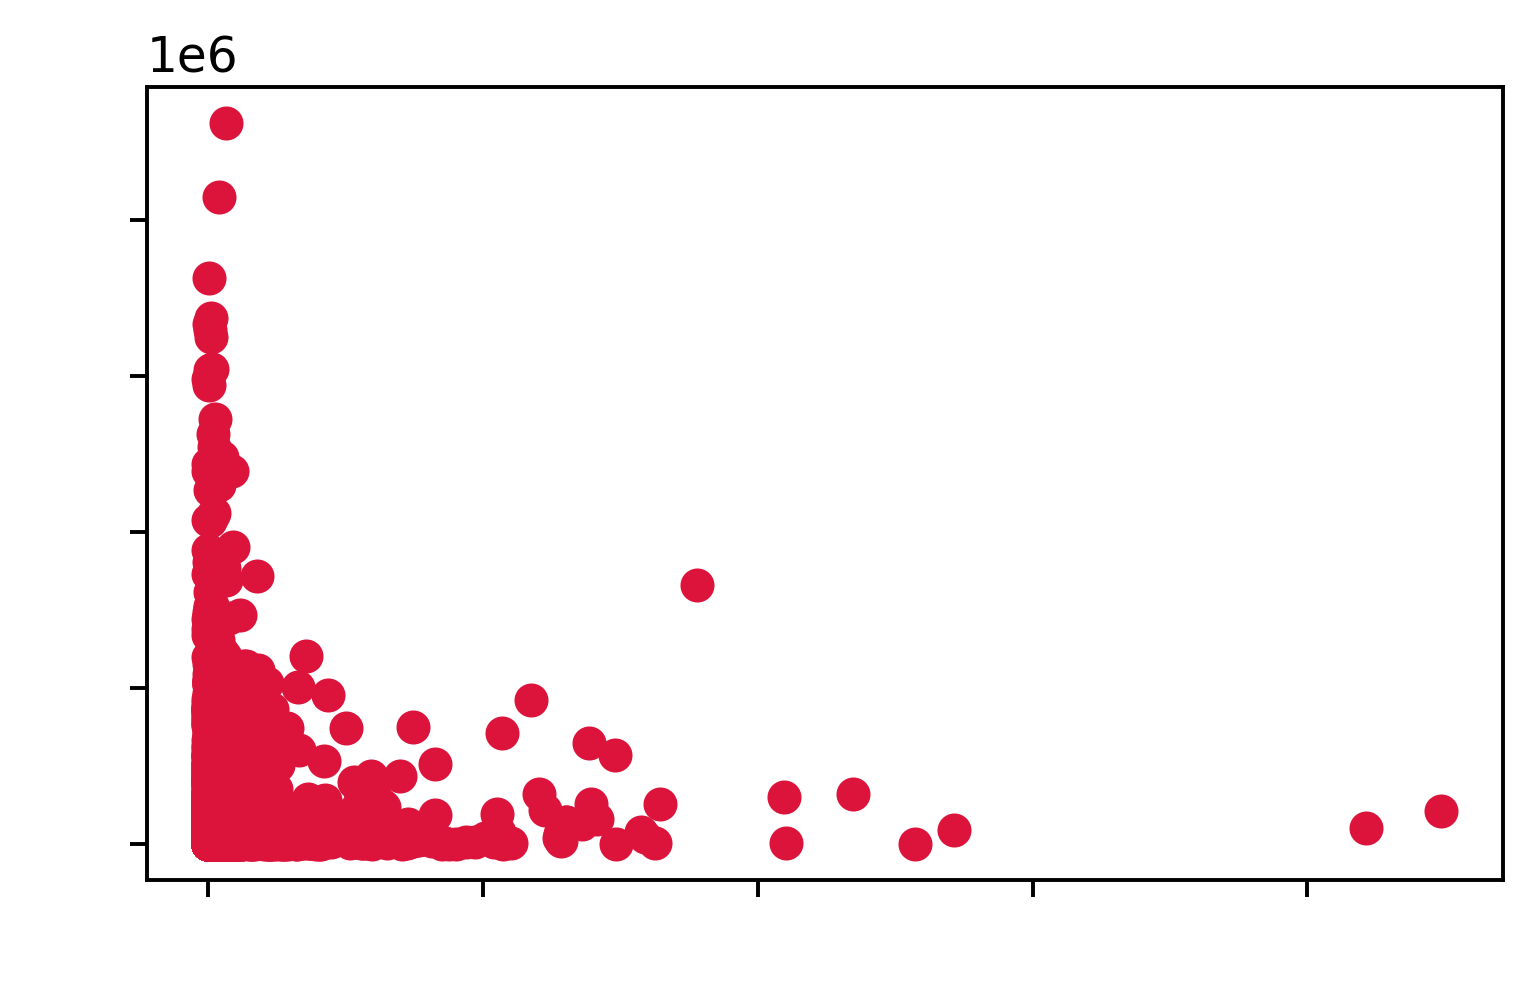

In [66]:
plt.figure(figsize=(5,3),dpi=350)
plt.scatter(value, vote, color='crimson')
plt.yticks(color='white')
plt.xticks(color='white')
plt.set
plt.show()

연속형 변수들의 뷰포인트와의 상관관계를 확인했으나 상광성이 거의 없어 보였다

value 값을 거의 3000개의 데이터셋이므로 등수 기준으로 범주화를 상, 중, 하로 하였다.

In [ ]:
bins = [1,36,172]

df_score['score'] = np.digitize(df_score['VALUE'], bins)

In [ ]:
df_score

In [ ]:
fig = px.box(df_score, y= "IMDb Score", 
             x= "score", hover_name='VALUE', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()


In [ ]:
sns.histplot(x=df_score['VALUE'], y=df_score['IMDb Score'])

viewpoint를 순위로 상중하로 나누어서 imdbscore를 확인 했으나 유의한 결과는 나오지 않았다.

In [67]:
fig = px.box(df_score, y= "Hidden Gem Score", x= "score", 
             hover_name='VALUE', color_discrete_sequence=px.colors.sequential.RdBu_r)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Title', 'Series or Movie', 'VALUE', 'Hidden Gem Score', 'IMDb Score', 'IMDb Votes'] but received: score

<AxesSubplot:xlabel='VALUE', ylabel='Hidden Gem Score'>

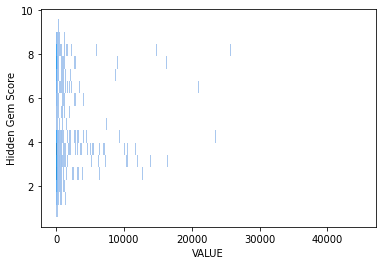

In [68]:
sns.histplot(x=df_score['VALUE'], y=df_score['Hidden Gem Score'])

Hidden Gem Score의 경우도 뷰포인트와의 연관이 없어보였다.

<AxesSubplot:xlabel='VALUE', ylabel='IMDb Votes'>

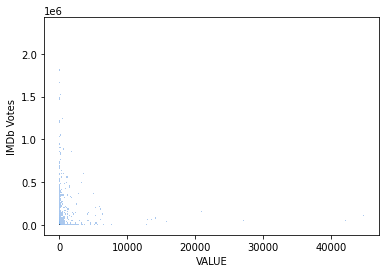

In [69]:
sns.histplot(x=df_score['VALUE'], y=df_score['IMDb Votes'])

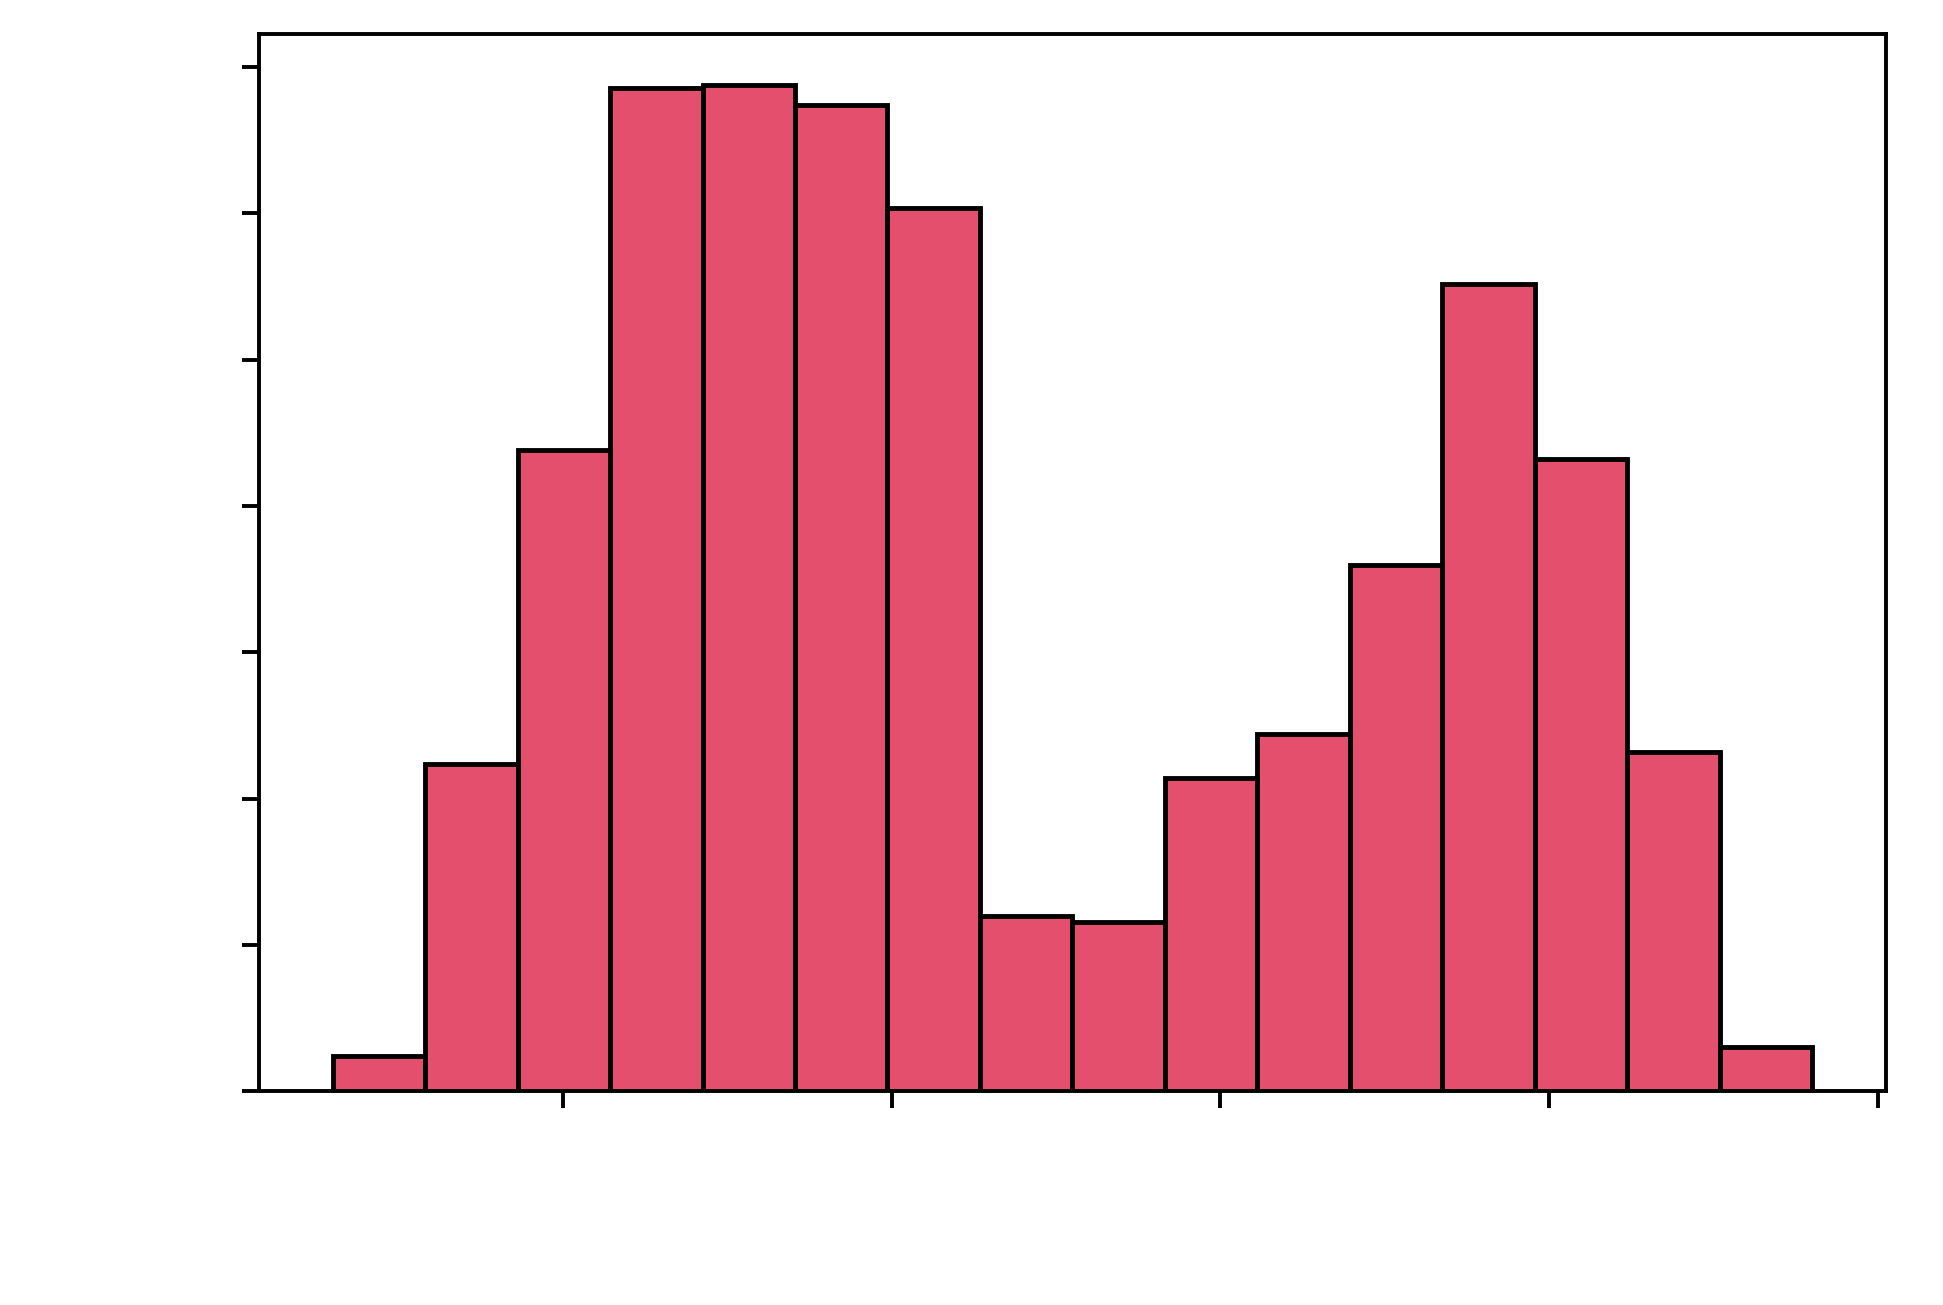

In [70]:
plt.figure(dpi=350)
sns.histplot(x=df_score['Hidden Gem Score'], color='crimson')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Hidden Gem Score', color='white', labelpad=10)
plt.ylabel('Count', color='white', labelpad=10)

plt.show()

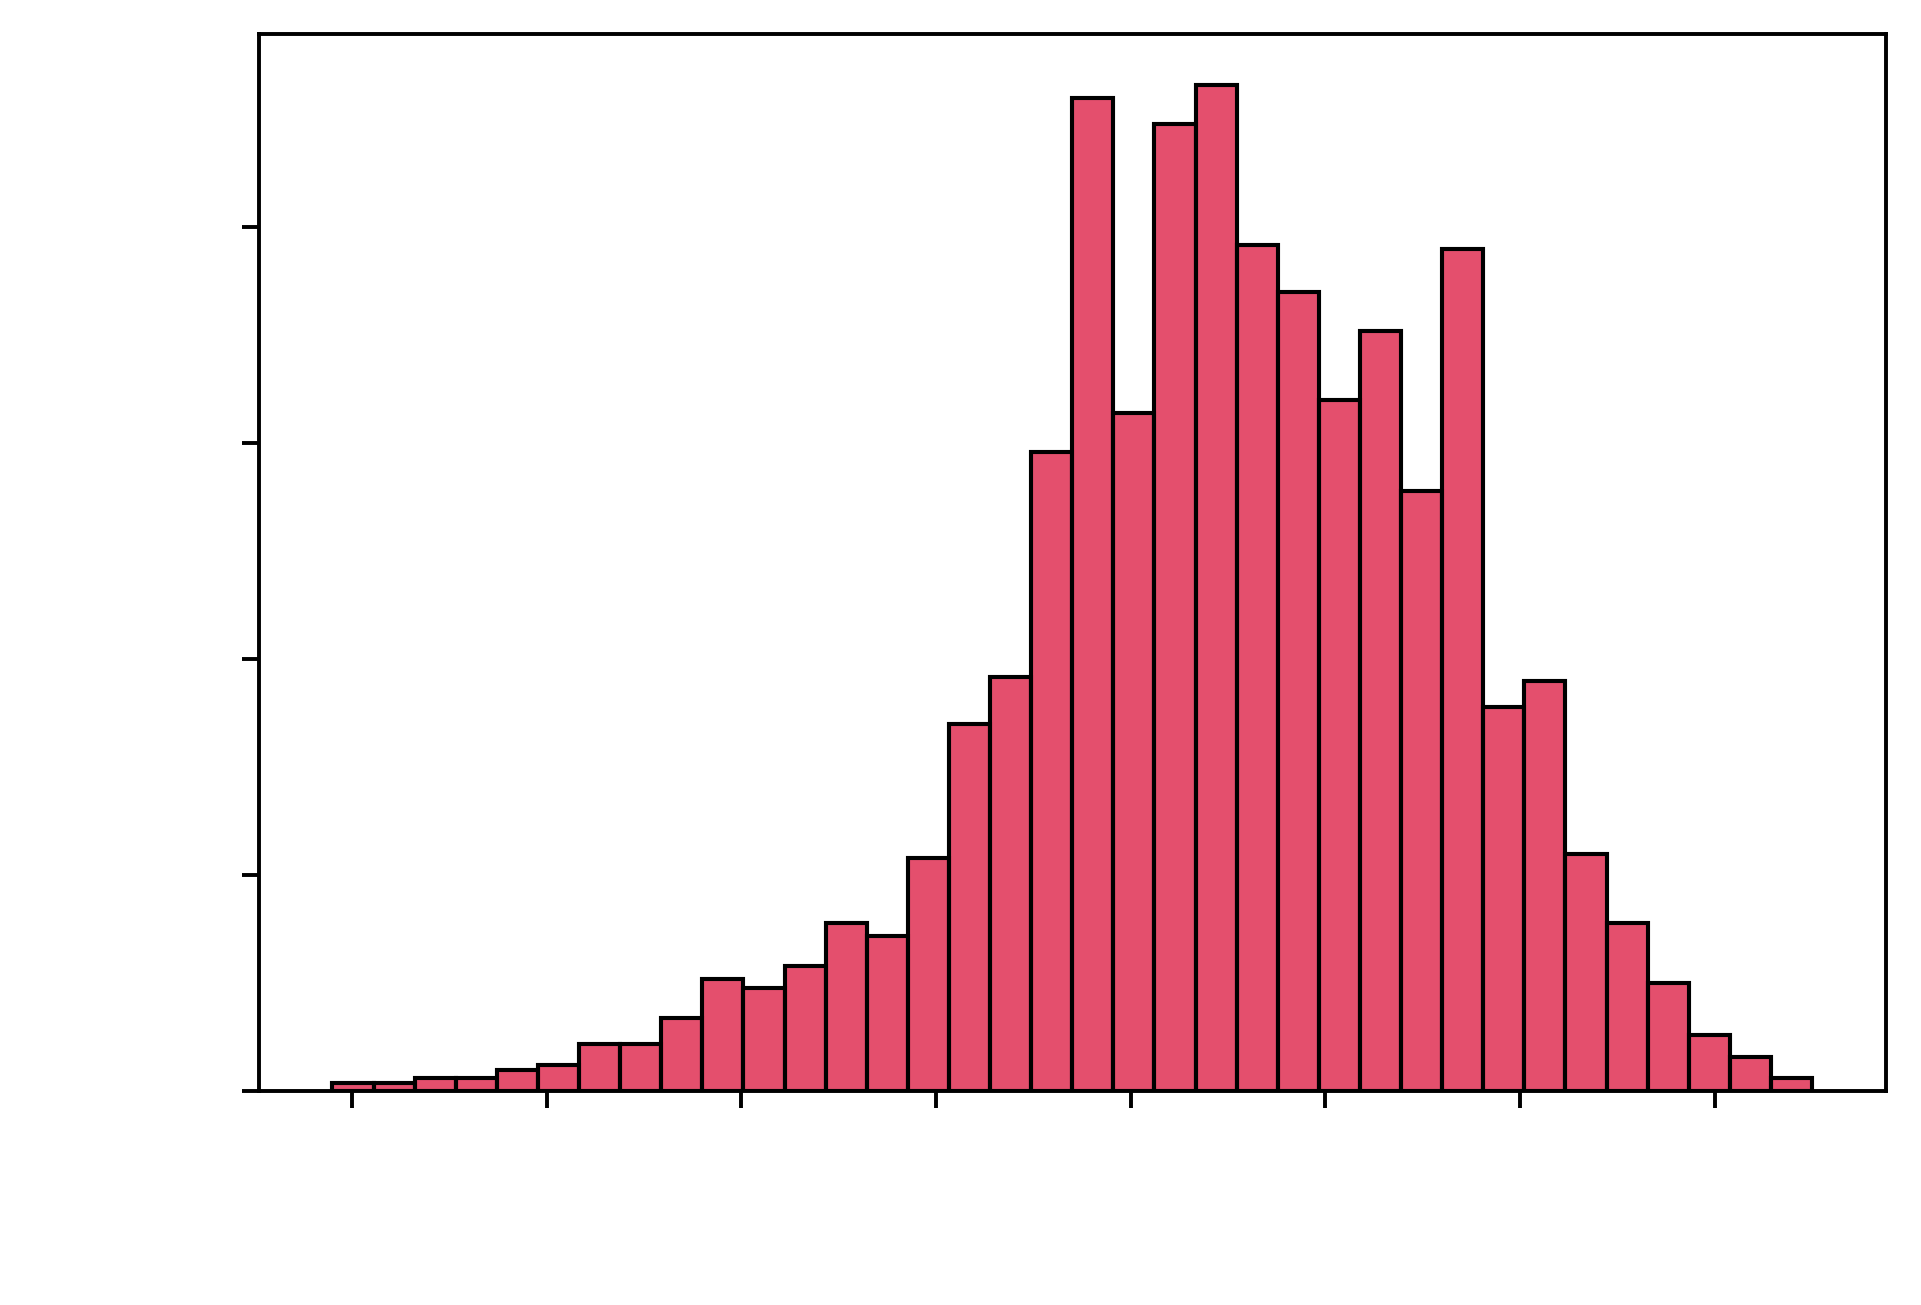

In [71]:
plt.figure(dpi=350)
sns.histplot(x=df_score['IMDb Score'], color='crimson')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('IMBD Score', color='white', labelpad=10)
plt.ylabel('Count', color='white', labelpad=10)
plt.show()